In [79]:
!pip install yfinance

In [80]:
!pip install mpl_finance

In [81]:
import pandas as pd
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [82]:
name = 'SPY'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2020-12-15",end="2021-04-15")



In [83]:

df['Date'] = range(df.shape[0])
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [84]:
def plot_chart(df):
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  fig.tight_layout()

  fig.show()

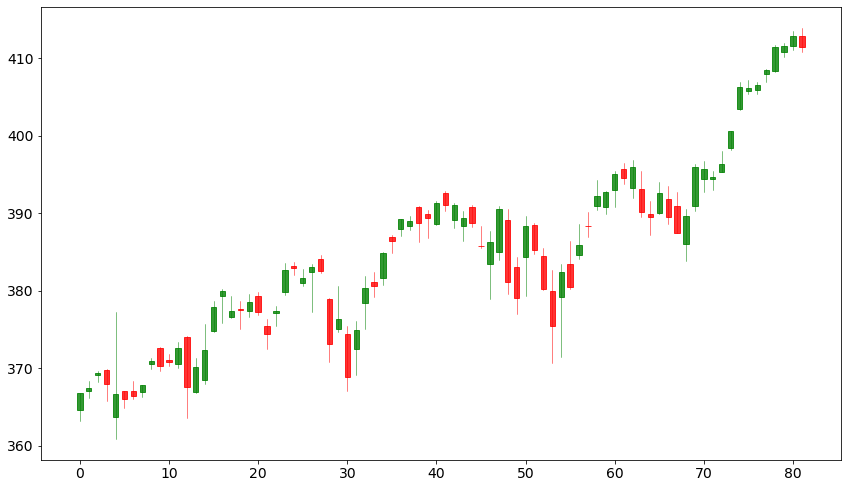

In [85]:
plot_chart(df)

In [86]:
df_ha = df.copy()

In [87]:
for i in range(df_ha.shape[0]):
  if i > 0:
    df_ha.loc[df_ha.index[i],'Open'] = (df['Open'][i-1] + df['Close'][i-1])/2
  
  df_ha.loc[df_ha.index[i],'Close'] = (df['Open'][i] + df['Close'][i] + df['Low'][i] +  df['High'][i])/4

df_ha = df_ha.iloc[1:,:]

    

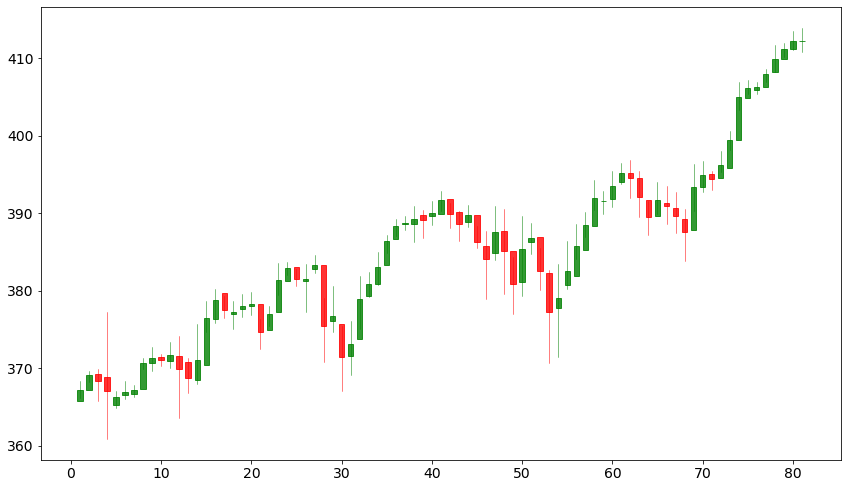

In [88]:
plot_chart(df_ha)